Fraud is one of the major issues we come up majorly in banks, life insurance, health insurance, and many others. These major frauds are dependent on the person who is trying to sell you the fake product or service, if you are matured enough to decide what is wrong then you will never get into any fraud transactions. But one such fraud that has been increasing a lot these days is fraud in making payments.

payment_fraud.csv

Write a classification program and compare various classification algorithms using payment_fraud.csv dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [4]:
fraud = pd.read.csv("payment_fraud.csv")
fraud

NameError: name 'pd' is not defined

In [2]:
print(fraud.dtypes)

NameError: name 'fraud' is not defined

In [4]:
fraud.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

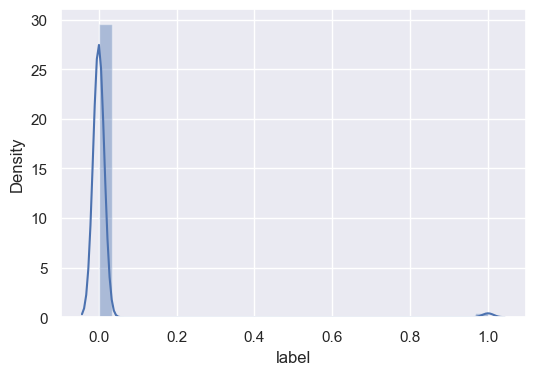

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(fraud['label'], bins=30)
plt.show()

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraud['paymentMethod'] = label_encoder.fit_transform(fraud['paymentMethod'])
#x=fraud.drop(['label'], axis=1)
fraud.head(20)

accountAgeDays  numItems  localTime  paymentMethod  paymentMethodAgeDays  \
0               29         1   4.745402              1             28.204861   
1              725         1   4.742303              2              0.000000   
2              845         1   4.921318              0              0.000000   
3              503         1   4.886641              0              0.000000   
4             2000         1   5.040929              0              0.000000   
5              119         1   4.962055              1              0.000000   
6             2000         1   4.921349              1              0.000000   
7              371         1   4.876771              0              0.000000   
8             2000         1   4.748314              0              0.000000   
9                4         1   4.461622              0              0.000000   
10              26         1   4.745402              1              0.000000   
11            2000         1   4.505662              0              0.000694   
12               3         1   4.962055              0              2.690972   
13               3         1   4.921318              0              2.069444   
14              23         1   4.745402              0              0.001389   
15               5         1   4.921349              1              4.036111   
16            1208         1   4.836982              0              0.000694   
17              11         1   4.921349              0             10.865972   
18             123         1   4.748314              0              0.000694   
19            2000         1   4.895263              0            248.774306   

    label  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  
10      0  
11      0  
12      0  
13      0  
14      0  
15      0  
16      0  
17      0  
18      0  
19      0

In [7]:
X = fraud[["accountAgeDays", "numItems", "localTime", "paymentMethod", "paymentMethodAgeDays"]].copy()
y = fraud[["label"]].copy()


In [8]:
X

accountAgeDays  numItems  localTime  paymentMethod  \
0                  29         1   4.745402              1   
1                 725         1   4.742303              2   
2                 845         1   4.921318              0   
3                 503         1   4.886641              0   
4                2000         1   5.040929              0   
...               ...       ...        ...            ...   
39216             986         1   4.836982              0   
39217            1647         1   4.876771              0   
39218            1591         1   4.742303              0   
39219             237         1   4.921318              0   
39220             272         1   5.040929              1   

       paymentMethodAgeDays  
0                 28.204861  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
...                     ...  
39216              0.000000  
39217            377.930556  
39218              0.000000  
39219            236.082639  
39220              0.000694  

[39221 rows x 5 columns]

In [9]:
y

label
0          0
1          0
2          0
3          0
4          0
...      ...
39216      0
39217      0
39218      0
39219      0
39220      0

[39221 rows x 1 columns]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(27454, 5)
(11767, 5)
(27454, 1)
(11767, 1)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
Y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 0.1174575119884695
R2 score is 0.0196903646046227


In [13]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

pred_train_rr= rr.predict(X_train)
print('RMSE of Training data:',np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print('R2 of Training data:',r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('RMSE of Test data:',np.sqrt(mean_squared_error(Y_test,pred_test_rr)))
print('R2 of Test data:',r2_score(Y_test, pred_test_rr))

RMSE of Training data: 0.11732750074744959
R2 of Training data: 0.021941253390854065
RMSE of Test data: 0.11745751163272589
R2 of Test data: 0.019690370542751245


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
X = fraud.iloc[:,0:6]
Y = fraud['paymentMethodAgeDays']

ridge_model = Ridge(alpha=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(ridge_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.000 (0.000)


In [15]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(lasso_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.002 (0.000)


In [16]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train)
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso)))
print(r2_score(Y_test, pred_test_lasso))

0.11765432042611404
0.01648483371909848
0.11764368397061087
0.01658028977988013
